In [117]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import mlab
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [118]:
# Reading the data form the csv file and converting into data frame using pandas lib.
df = pd.read_csv("wms.csv", sep=",")

In [119]:
df.head()

,Client ID,Date,Time,Temparature,Pressure,Humidity,Wind Speed,Wind Direction,Rain
0,10101,2016-10-13,12:48:16,2747.0,91061.0,4265.0,1,150.0,111111.0
1,10101,2016-10-13,12:54:56,2747.0,91035.0,4275.0,7.14,40.0,111111.0
2,10101,2016-10-13,12:57:16,2747.0,91044.0,4258.0,8.83,335.0,111111.0
3,10101,2016-10-13,12:59:26,2747.0,91040.0,7253.0,9.38,330.0,111111.0
4,10101,2016-10-13,13:06:16,2747.0,91022.0,4252.0,6.24,185.0,111111.0


In [120]:
df = df.dropna(how="all", axis=0)

In [121]:
df.shape

(1678, 9)

In [122]:
df = df.replace("wwww", 0)

In [123]:
df = df[df['Temparature'] > 0]

In [124]:
df.shape

(1677, 9)

In [125]:
df = df[df['Pressure'] > 0]

In [126]:
df.shape

(1667, 9)

In [127]:
df = df[df['Humidity'] > 0]

In [128]:
df.shape

(1667, 9)

In [129]:
df = df[df['Wind Speed'] > 0]

In [130]:
df.shape

(1664, 9)

In [131]:
df = df[df['Wind Direction'] > 0]

In [132]:
df.shape

(1355, 9)

In [133]:
df = df[df['Rain'] > 0]

In [134]:
df.shape

(1338, 9)

In [135]:
df.head()

,Client ID,Date,Time,Temparature,Pressure,Humidity,Wind Speed,Wind Direction,Rain
0,10101,2016-10-13,12:48:16,2747.0,91061.0,4265.0,1,150.0,111111.0
1,10101,2016-10-13,12:54:56,2747.0,91035.0,4275.0,7.14,40.0,111111.0
2,10101,2016-10-13,12:57:16,2747.0,91044.0,4258.0,8.83,335.0,111111.0
3,10101,2016-10-13,12:59:26,2747.0,91040.0,7253.0,9.38,330.0,111111.0
4,10101,2016-10-13,13:06:16,2747.0,91022.0,4252.0,6.24,185.0,111111.0


In [136]:
df_humidity = df.Humidity.apply(lambda x: x * 0.01)

In [137]:
df.head()

,Client ID,Date,Time,Temparature,Pressure,Humidity,Wind Speed,Wind Direction,Rain
0,10101,2016-10-13,12:48:16,2747.0,91061.0,4265.0,1,150.0,111111.0
1,10101,2016-10-13,12:54:56,2747.0,91035.0,4275.0,7.14,40.0,111111.0
2,10101,2016-10-13,12:57:16,2747.0,91044.0,4258.0,8.83,335.0,111111.0
3,10101,2016-10-13,12:59:26,2747.0,91040.0,7253.0,9.38,330.0,111111.0
4,10101,2016-10-13,13:06:16,2747.0,91022.0,4252.0,6.24,185.0,111111.0


In [138]:
df_humidity.head()

0    42.65
1    42.75
2    42.58
3    72.53
4    42.52
Name: Humidity, dtype: float64

In [139]:
df['Humidity'] = df_humidity

In [140]:
df.head()

,Client ID,Date,Time,Temparature,Pressure,Humidity,Wind Speed,Wind Direction,Rain
0,10101,2016-10-13,12:48:16,2747.0,91061.0,42.65,1,150.0,111111.0
1,10101,2016-10-13,12:54:56,2747.0,91035.0,42.75,7.14,40.0,111111.0
2,10101,2016-10-13,12:57:16,2747.0,91044.0,42.58,8.83,335.0,111111.0
3,10101,2016-10-13,12:59:26,2747.0,91040.0,72.53,9.38,330.0,111111.0
4,10101,2016-10-13,13:06:16,2747.0,91022.0,42.52,6.24,185.0,111111.0


In [141]:
df_temparature = df.Temparature.apply(lambda x : x * 0.01)

In [142]:
df_temparature.head()

0    27.47
1    27.47
2    27.47
3    27.47
4    27.47
Name: Temparature, dtype: float64

In [143]:
df['Temparature'] = df_temparature

In [144]:
df.head()

,Client ID,Date,Time,Temparature,Pressure,Humidity,Wind Speed,Wind Direction,Rain
0,10101,2016-10-13,12:48:16,27.47,91061.0,42.65,1,150.0,111111.0
1,10101,2016-10-13,12:54:56,27.47,91035.0,42.75,7.14,40.0,111111.0
2,10101,2016-10-13,12:57:16,27.47,91044.0,42.58,8.83,335.0,111111.0
3,10101,2016-10-13,12:59:26,27.47,91040.0,72.53,9.38,330.0,111111.0
4,10101,2016-10-13,13:06:16,27.47,91022.0,42.52,6.24,185.0,111111.0


In [145]:
df.describe()

,Client ID,Temparature,Pressure,Humidity,Wind Direction,Rain
count,1338.0,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,10101.0,25.754694,116735.597160,47.512198,190.934903,79554.922720
std,0.0,5.228028,111364.132767,8.023188,320.768506,46600.181941
min,10101.0,0.270000,1111.000000,0.200000,1.000000,0.400000
25%,10101.0,25.370000,91032.000000,44.740000,50.000000,11111.000000
50%,10101.0,27.470000,91184.000000,45.380000,237.000000,111111.000000
75%,10101.0,27.470000,91282.000000,56.570000,282.000000,111111.000000
max,10101.0,60.400000,599109.000000,72.530000,11111.000000,111111.000000


In [146]:
df['Wind Speed'] = df['Wind Speed'].astype(float)

In [147]:
df.head()

,Client ID,Date,Time,Temparature,Pressure,Humidity,Wind Speed,Wind Direction,Rain
0,10101,2016-10-13,12:48:16,27.47,91061.0,42.65,1.00,150.0,111111.0
1,10101,2016-10-13,12:54:56,27.47,91035.0,42.75,7.14,40.0,111111.0
2,10101,2016-10-13,12:57:16,27.47,91044.0,42.58,8.83,335.0,111111.0
3,10101,2016-10-13,12:59:26,27.47,91040.0,72.53,9.38,330.0,111111.0
4,10101,2016-10-13,13:06:16,27.47,91022.0,42.52,6.24,185.0,111111.0


In [148]:
df.describe()

,Client ID,Temparature,Pressure,Humidity,Wind Speed,Wind Direction,Rain
count,1338.0,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,10101.0,25.754694,116735.597160,47.512198,46.218550,190.934903,79554.922720
std,0.0,5.228028,111364.132767,8.023188,477.987541,320.768506,46600.181941
min,10101.0,0.270000,1111.000000,0.200000,0.000000,1.000000,0.400000
25%,10101.0,25.370000,91032.000000,44.740000,0.000000,50.000000,11111.000000
50%,10101.0,27.470000,91184.000000,45.380000,0.000000,237.000000,111111.000000
75%,10101.0,27.470000,91282.000000,56.570000,0.000000,282.000000,111111.000000
max,10101.0,60.400000,599109.000000,72.530000,9000.000000,11111.000000,111111.000000


In [149]:
df.drop('Client ID', axis=1, inplace=True)

In [151]:
df.head()

,Date,Time,Temparature,Pressure,Humidity,Wind Speed,Wind Direction,Rain
0,2016-10-13,12:48:16,27.47,91061.0,42.65,1.00,150.0,111111.0
1,2016-10-13,12:54:56,27.47,91035.0,42.75,7.14,40.0,111111.0
2,2016-10-13,12:57:16,27.47,91044.0,42.58,8.83,335.0,111111.0
3,2016-10-13,12:59:26,27.47,91040.0,72.53,9.38,330.0,111111.0
4,2016-10-13,13:06:16,27.47,91022.0,42.52,6.24,185.0,111111.0


In [152]:
df.drop('Time', axis=1, inplace=True)

In [153]:
df.head()

,Date,Temparature,Pressure,Humidity,Wind Speed,Wind Direction,Rain
0,2016-10-13,27.47,91061.0,42.65,1.00,150.0,111111.0
1,2016-10-13,27.47,91035.0,42.75,7.14,40.0,111111.0
2,2016-10-13,27.47,91044.0,42.58,8.83,335.0,111111.0
3,2016-10-13,27.47,91040.0,72.53,9.38,330.0,111111.0
4,2016-10-13,27.47,91022.0,42.52,6.24,185.0,111111.0


In [154]:
corr = df.corr(method='pearson', min_periods=1)

In [155]:
corr.head()

,Temparature,Pressure,Humidity,Wind Speed,Wind Direction,Rain
Temparature,1.000000,0.050401,0.223943,0.003659,0.124026,0.017554
Pressure,0.050401,1.000000,0.101225,0.056588,-0.151522,-0.345178
Humidity,0.223943,0.101225,1.000000,0.019208,-0.132029,-0.501552
Wind Speed,0.003659,0.056588,0.019208,1.000000,0.067509,-0.118399
Wind Direction,0.124026,-0.151522,-0.132029,0.067509,1.000000,0.108536


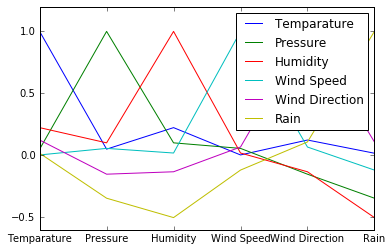

In [175]:
corr.plot()
plt.show()

In [173]:
variance = df.var(axis=None, skipna=None, level=None, ddof=1, numeric_only=None)

In [176]:
variance.head()

Temparature       2.733227e+01
Pressure          1.240197e+10
Humidity          6.437155e+01
Wind Speed        2.284721e+05
Wind Direction    1.028924e+05
dtype: float64

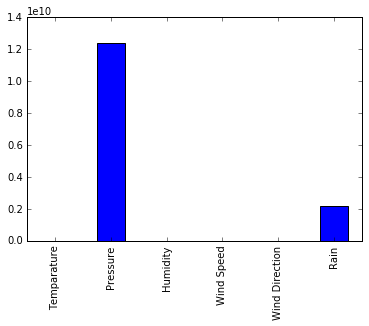

In [179]:
variance.plot(kind='bar')

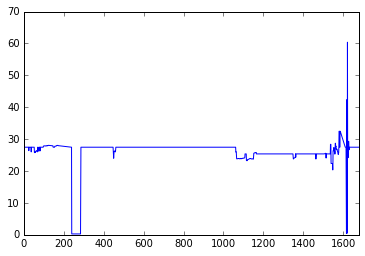

In [181]:
t_series_1 = df.Temparature.plot()

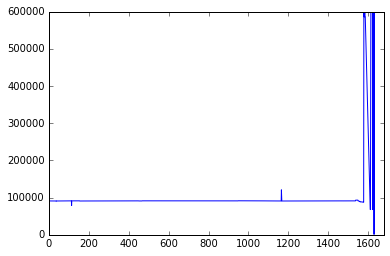

In [183]:
t_series_2 = df.Pressure.plot()

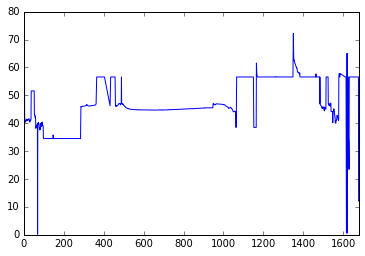

In [185]:
t_series_3 = df.Humidity.plot()

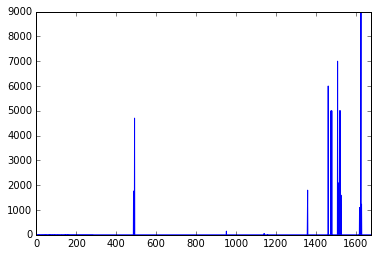

In [187]:
t_series_4 = df['Wind Speed'].plot()

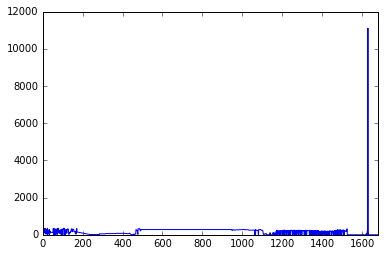

In [188]:
t_series_5 = df['Wind Direction'].plot()